In [3]:
from sklearn.preprocessing import (
 RobustScaler, QuantileTransformer,
 
)
from sklearn.ensemble import IsolationForest
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
data=pd.read_csv('Train.csv')
data2=pd.read_csv('data2.csv')

In [5]:
temp = data[['Weight_in_gms', 'Cost_of_the_Product', 'Discount_offered']].fillna(0)

iso = IsolationForest(contamination=0.05, random_state=42)
yt = iso.fit_predict(temp)


m = yt != -1
clean = data[m]
print(f"Removed {len(data) - len(clean)} outlier rows using Isolation Forest.")

Removed 50 outlier rows using Isolation Forest.


In [6]:
r_scalar = RobustScaler()
df_robust = r_scalar.fit_transform(data[['Discount_offered']])
print("Robust Scale discount (First 5):\n",df_robust[:5].flatten())

Robust Scale discount (First 5):
 [0.40625 0.09375 0.375   0.6875  0.34375]


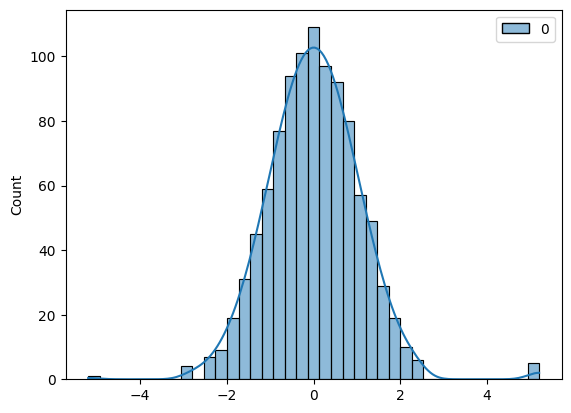

In [7]:
q_trans = QuantileTransformer(output_distribution='normal',random_state=42)
df_quantile = q_trans.fit_transform(data[['Cost_of_the_Product']])
sns.histplot(df_quantile,kde=True)
plt.show()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class RareLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, tol = 0.05, replace_with='Other'):
        self.tol = tol
        self.replace_with = replace_with
        self.frequent_labels_ = {}
    def fit(self,X,y=None):
        for col in X.columns:
            freqs = pd.Series(X[col]).value_counts(normalize = True)
            self.frequent_labels_[col] = freqs[freqs >= self.tol].index.tolist()
        return self
    def transform(self,X):
        x_copy = X.copy()
        for col in self.frequent_labels_:
            x_copy[col] = np.where(x_copy[col].isin(self.frequent_labels_[col]),
                                   x_copy[col],self.replace_with)
        return x_copy

rare_imputer = RareLabelEncoder(tol=0.10)
df_rare = rare_imputer.fit_transform(data2[['Product_importance','Destination_City']])
print(f"Unique cities before: {data2['Destination_City'].nunique()},After: {df_rare['Destination_City'].nunique()}") 
df_rare['Destination_City']

Unique cities before: 55,After: 1


0      Other
1      Other
2      Other
3      Other
4      Other
       ...  
995    Other
996    Other
997    Other
998    Other
999    Other
Name: Destination_City, Length: 1000, dtype: object